<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Sistemi linearnih enačb (2)</b></font>
<br><br>
<font size="4">
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2"> Julij 2017</font>
</center>

# Table of Contents
 <p><div class="lev1"><a href="#Razcep-LU"><span class="toc-item-num">1&nbsp;&nbsp;</span>Razcep LU</a></div><div class="lev2"><a href="#Razcep-Doolittle"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Razcep Doolittle</a></div><div class="lev2"><a href="#Teoretično-ozadje"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Teoretično ozadje</a></div><div class="lev2"><a href="#Razcep-LU-—-povzetek"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Razcep LU — povzetek</a></div><div class="lev2"><a href="#Uporaba-in-zaključki"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Uporaba in zaključki</a></div><div class="lev1"><a href="#Pivotiranje"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pivotiranje</a></div><div class="lev2"><a href="#Diagonalno-dominantna-matrika"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Diagonalno dominantna matrika</a></div><div class="lev2"><a href="#Gaussova-eliminacija-z-delnim-pivotiranjem"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gaussova eliminacija z delnim pivotiranjem</a></div><div class="lev2"><a href="#Razcep-LU-z-delnim-pivotiranjem"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Razcep LU z delnim pivotiranjem</a></div><div class="lev1"><a href="#Modul-SciPy"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modul <code>SciPy</code></a></div><div class="lev1"><a href="#Inverz-matrik"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inverz matrik</a></div><div class="lev1"><a href="#Psevdoinverz---reševanje-predoločenih-sistemov"><span class="toc-item-num">5&nbsp;&nbsp;</span>Psevdoinverz - reševanje predoločenih sistemov</a></div><div class="lev1"><a href="#Iterativne-metode"><span class="toc-item-num">6&nbsp;&nbsp;</span>Iterativne metode</a></div><div class="lev2"><a href="#Gauss-Seidlova-metoda"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Gauss-Seidlova metoda</a></div><div class="lev2"><a href="#Zgled"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Zgled</a></div><div class="lev1"><a href="#Nekaj-vprašanj-za-razmislek!"><span class="toc-item-num">7&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev2"><a href="#Dodatno"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Dodatno</a></div>

In [154]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
sym.init_printing()

# Razcep LU

Za določitev rešitve sistema enačb, Gaussov eliminacijski postopek zahteva najmanjše število računskih operacij. V primeru, da se matrika koeficientov $\mathbf{A}$ ne spreminja, je mogoče ob spremembi vektor konstant $\mathbf{b}$ določiti računsko manj zahtevno, brez ponovne Gaussove eliminacije. V ta namen si bomo pogledali razcep LU!

Poljubno matriko lahko zapišemo kot produkt dveh matrik:
$$\mathbf{A}=\mathbf{B}\,\mathbf{C}.$$
Pri tem je možnosti za zapis matrik $\mathbf{B}$ in $\mathbf{C}$ neomejeno veliko.

Pri razcepu LU, se bomo omejili na spodnje trikotno matriko $\mathbf{B}=\mathbf{L}$ in zgornje trikotno matriko $\mathbf{C}=\mathbf{U}$:
$$\mathbf{A}=\mathbf{L}\,\mathbf{U}.$$
Vsaka od matrik $\mathbf{L}$ in $\mathbf{U}$ je definirana z $(n+1)\,n/2$ elementi; skupaj torej $n^2+n$ neznank. Pri tem pa znana matrika $\mathbf{A}$ definiran $n^2$ vrednosti. Za enolično določitev matrik $\mathbf{L}$ in $\mathbf{U}$ manjka torej $n$ enačb. Tukaj bomo uporabili t.i. **Doolittle** LU razcep, ki dodatne enačbe pridobi s pogojem $L_{ii}=1$.

Če torej linearni sistem:
$$\mathbf{A}\mathbf{x}=\mathbf{b}$$
zapišemo z rezcepom matrike $\mathbf{A}$:
$$\mathbf{L}\,\underbrace{\mathbf{U}\,\mathbf{x}}_{\mathbf{y}}=\mathbf{b},$$
predpostavimo, da sta $\mathbf{U}$ in $\mathbf{L}$ znani matriki.

Namesto neznanega vektorja $\mathbf{x}$ torej najprej določimo vektor $\mathbf{y}$:
$$\mathbf{L}\,\mathbf{y}=\mathbf{b}.\qquad \textrm{(1. korak)}$$
Ko je $\mathbf{y}$ določen lahko iz:
$$\mathbf{U}\,\mathbf{x}=\mathbf{y}\qquad \textrm{(2. korak)}$$
določimo $\mathbf{x}$.

## Razcep LU matrike koeficientov $\mathbf{A}$

V nadaljevanju bomo pokazali, da Gaussova eliminacija predstavlja razcep LU matrike koeficientov $\mathbf{A}$.

Pokaz začnimo na primeru simbolno zapisanih matrik $\mathbf{L}$ in $\mathbf{U}$ dimenzije $3\times 3$:

In [155]:
L21, L31, L32 = sym.symbols('L21, L31, L32')
U11, U12, U13, U22, U23, U33 = sym.symbols('U11, U12, U13, U22, U23, U33')
L = sym.Matrix([[  1,   0,  0],
                [L21,   1,  0],
                [L31, L32,  1]])
U = sym.Matrix([[U11, U12, U13],
                [  0, U22, U23],
                [  0,   0, U33]])

Matrika koeficientov zapisana z elementi matrik $\mathbf{L}$ in  $\mathbf{U}$ torej je:

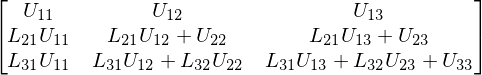

In [156]:
A = L*U
A

Izvedemo sedaj Gaussovo eliminacijo nad matriko koeficientov $\mathbf{A}$. 

S pomočjo prve vrstice izvedimo sedaj Gaussovo eliminacijo v prve stolpcu:

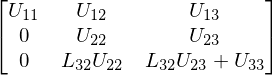

In [157]:
A[1,:] -= L21 * A[0,:]
A[2,:] -= L31 * A[0,:]
A

Nadaljujemo v drugem stolpcu:

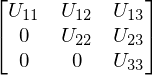

In [158]:
A[2,:] -= L32 * A[1,:]
A

Iz zgornje eliminacije ugotovimo:
1. matrika $\mathbf{U}$ je enaka matriki, ki jo dobimo, če izvedemo Gaussovo eliminacijo nad matriko koeficientov $\mathbf{A}$.
* izven diagonalni členi $\mathbf{L}$ predstavljajo faktorje, ki smo jih uporabili pri Gaussovi eliminaciji.

## Numerična implementacija LU razcepa

Numerična implementacija se od numerične implementacije Gaussove eliminacije razlikuje samo v tem, da se koeficient s katerim množimo pivotno vrsto `m` shranjuje v matriko `L`. Poglejmo si implementacijo na primeru:

In [159]:
A = np.array([[8, -6, 3],
              [-6, 6, -6],
              [3, -6, 6]], dtype=float) 
b = np.array([-14, 36, 6], dtype=float)

In [160]:
(v, s) = A.shape
U = A.copy() 
L = np.zeros_like(A)
# eliminacija
for p, pivot_vrsta in enumerate(U[:-1]):
    for i, vrsta in enumerate(U[p+1:]):
        if pivot_vrsta[p]:
            m = vrsta[p]/pivot_vrsta[p]
            vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*m
            L[p+1+i, p] = m
    print('Korak: {:g}'.format(p))
    print(U)

Korak: 0
[[ 8.    -6.     3.   ]
 [ 0.     1.5   -3.75 ]
 [ 0.    -3.75   4.875]]
Korak: 1
[[ 8.   -6.    3.  ]
 [ 0.    1.5  -3.75]
 [ 0.    0.   -4.5 ]]


In [161]:
L

array([[ 0.   ,  0.   ,  0.   ],
       [-0.75 ,  0.   ,  0.   ],
       [ 0.375, -2.5  ,  0.   ]])

Dopolnimo diagonalo $\mathbf{L}$:

In [162]:
for i in range(v):
    L[i, i] = 1.

In [163]:
L

array([[ 1.   ,  0.   ,  0.   ],
       [-0.75 ,  1.   ,  0.   ],
       [ 0.375, -2.5  ,  1.   ]])

Sedaj lahko rešimo sistem enačb $\mathbf{L}\,\mathbf{y}=\mathbf{b}$:

In [164]:
# direktno vstavljanje
y = np.zeros_like(b)
for i, b_ in enumerate(b):
    y[i] = (b_ - np.dot(L[i, :i], y[:i]))    

In [165]:
y

array([-14. ,  25.5,  75. ])

Nadaljujemo z reševanjem $\mathbf{U}\,\mathbf{x}=\mathbf{y}$:

In [166]:
U

array([[ 8.  , -6.  ,  3.  ],
       [ 0.  ,  1.5 , -3.75],
       [ 0.  ,  0.  , -4.5 ]])

In [167]:
y

array([-14. ,  25.5,  75. ])

In [168]:
# obratno vstavljanje
x = np.zeros_like(b)
for i in range(v-1, -1,-1):
    x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
x

array([-14.        , -24.66666667, -16.66666667])

In [169]:
x

array([-14.        , -24.66666667, -16.66666667])

Kakor smo navedli zgoraj, ob spremembi vektorja konstant, ponovna Gaussova eliminacija ni potrebna; traba je izvesti samo direktno in nato obratno vstavljane. Primer:

In [170]:
b = np.array([-1., 6., 7.])
y = np.zeros_like(b)
for i, b_ in enumerate(b):#direktno vstavljanje
    y[i] = (b_ - np.dot(L[i, :i], y[:i]))    
x = np.zeros_like(b)
for i in range(v-1, -1,-1):# obratno vstavljanje
    x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
x

array([-4.33333333, -7.88888889, -4.55555556])

In [171]:
A.dot(x)

array([-1.,  6.,  7.])

# Pivotiranje

Poglejmo si za motivacijo spodnji sistem enačb:

In [172]:
A = np.array([[8, -6, 3],
              [-6, 6, -6],
              [0, -6, 6]], dtype=float) # poskusite tukaj izpustiti dtype=float in preveriet rezultat
b = np.array([-14, 36, 6], dtype=float)

Najprej želimo zamenjati prvo in zadnjo vrstico v matriki koeficientov $\mathbf{A}$ in vektorju neznank $\mathbf{b}$. Zamenjavo bi lahko izvedli z uporabo začasne spremenljivke. Obstaja pa tudi način s t.i. [naprednim rezanjem](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), ki vrne kopijo, ne pogled:

In [173]:
A[[0], :], A[[2], :] = A[[2], :], A[[0], :]
A

array([[ 0., -6.,  6.],
       [-6.,  6., -6.],
       [ 8., -6.,  3.]])

In [174]:
b[[0]], b[[2]] = b[[2]], b[[0]]
b

array([  6.,  36., -14.])

Če bi sedaj izvedli Gaussovo eliminacijo v prvem stolpcu matrike $\mathbf{A}$:

In [175]:
A[1,:] - A[1,0]/A[0,0] * A[0,:]

C:\Users\Janko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\Janko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


array([ nan, -inf,  inf])

Opazimo, da imamo težavo z deljenjem z 0 v prvi vrstici. Seveda pa se lahko zgodi, da vrednost ne bo 0, ampak bo zelo majhna vrednost $\varepsilon$ in v tem primeru bomo pri Gaussovi eliminaciji delili z zelo majhno vrednostjo (to pa bi povečevalo nagotovost).

Če bi pred Gaussovo eliminacijo ustrezno zamenjali vrstice (to imenujemo **pivotiranje vrstic**), potem teh težav ne bi imeli.

Pokazati je mogoče, da pri reševanju sistema enačb $\mathbf{A}\,\mathbf{x}=\mathbf{b}$, pri katerem je matrika $\mathbf{A}$ diagonalno dominantna, pivotiranje po vrsticah ni potrebno. Reševanje je brez pivotiranja numerično stabilno.

Pravokotna matrika $\mathbf{A}$ dimenzije $n$ je **diagonalno dominantna**, če je diagonalni element večji kot vsota absolutnih vrednosti ostalih elementov:
$$ |A_{ii}|> \sum_{j=1, j\ne i}^n |A_{ij}|$$


## Gaussova eliminacija z delnim pivotiranjem

Pogledali si bomo Gaussovo eliminacijo z **delnim pivotiranjem**. To v bistvu pomeni, da preden se izvede eliminacija, se preveri, ali je vrednost v izbranem stolpcu na diagonali res največja. Če vrednost ni največja, se diagonalno vrsto zamenja z vrsto (pod diagonalo), kjer je največja vrednost v stolpcu. V koliko bi izvedli **polno pivotiranje** bi poleg zamenjave vrstic, uporabili tudi zamenjavo vrstnega reda spremenljivk (zamenjava stolpcev). Polno pivotiranje izboljša stabilnost; se pa redko uporablja celo v komercialnih programih in ga tukaj ne bomo obravnavali.

Spremenjen algoritem za Gaussovo eliminacijo z delnim pivotiranjem torej je:

In [176]:
def gaussova_eliminacija_pivotiranje(A, b, prikazi_korake=False):
    """ Vrne Gaussovo eliminacijo razširjene matrike koeficientov, uporabi delno pivotiranje

    :param A: matrika koeficientov
    :param b: vektor konstant
    :param prikazi_korake: ali izpišem posamezne korake
    :return Ab: predelana razširjena matrika koeficientov
    """
    Ab = np.column_stack((A, b))
    for p in range(len(Ab)-1):
        p_max = np.argmax(np.abs(Ab[p:,p]))+p
        if p != p_max:
            Ab[[p], :], Ab[[p_max], :] = Ab[[p_max], :], Ab[[p], :]
        pivot_vrsta = Ab[p, :]                
        for vrsta in Ab[p + 1:]:
            if pivot_vrsta[p]:
                vrsta[p:] -= pivot_vrsta[p:] * vrsta[p] / pivot_vrsta[p]
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print('Pivot vrsta:', pivot_vrsta)
            print(Ab)
    return Ab

In [177]:
A

array([[ 0., -6.,  6.],
       [-6.,  6., -6.],
       [ 8., -6.,  3.]])

In [178]:
Ab = gaussova_eliminacija_pivotiranje(A, b, prikazi_korake=True)

Korak: 0
Pivot vrsta: [  8.  -6.   3. -14.]
[[  8.    -6.     3.   -14.  ]
 [  0.     1.5   -3.75  25.5 ]
 [  0.    -6.     6.     6.  ]]
Korak: 1
Pivot vrsta: [ 0. -6.  6.  6.]
[[  8.    -6.     3.   -14.  ]
 [  0.    -6.     6.     6.  ]
 [  0.     0.    -2.25  27.  ]]


## Razcep LU z delnim pivotiranjem

Podobno kakor pri Gaussovi eliminaciji, lahko razcep LU razširimo z delnim pivotiranjem in tako postane reševanje numerično **stabilno**. Paziti moramo na to, dashranimo, kako so se vrstice zamenjale in to potem posredovati tudi v funkcijo za rešitev.

In [179]:
def LU_razcep_pivotiranje(A, prikazi_korake=False):
    """ Vrne razcep LU matriko in vektor zamenjanih vrstic pivotiranje, uporabi delno pivotiranje

    :param A:               matrika koeficientov
    :param prikazi_korake:  izpišem posamezne korake
    :return LU:             LU matrika
    :return pivotiranje:    vektor zamenjave vrstic (pomembno pri iskanju rešitve)    
    """
    LU = A.copy()
    pivotiranje = np.arange(len(A))
    for p in range(len(LU)-1):
        p_max = np.argmax(np.abs(LU[p:,p]))+p
        if p != p_max:
            LU[[p], :], LU[[p_max], :] = LU[[p_max], :], LU[[p], :]
            pivotiranje[p], pivotiranje[p_max] = pivotiranje[p_max], pivotiranje[p]
        pivot_vrsta = LU[p, :]                
        for vrsta in LU[p + 1:]:
            if pivot_vrsta[p]:
                m = vrsta[p] / pivot_vrsta[p]
                vrsta[p:] -= pivot_vrsta[p:] * m
                vrsta[p] = m
            else:
                raise Exception('Deljenje z 0.')
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print('Pivot vrsta:', pivot_vrsta)
            print(LU)
    return LU, pivotiranje

In [180]:
A = np.array([[0, -6, 6],
              [-6, 6, -6],
              [8, -6, 3]], dtype=float) # poskusite tukaj izpustiti dtype=float in 
b = np.array([-14, 36, 6], dtype=float)

In [181]:
lu, piv = LU_razcep_pivotiranje(A, prikazi_korake=True)

Korak: 0
Pivot vrsta: [ 8. -6.  3.]
[[ 8.   -6.    3.  ]
 [-0.75  1.5  -3.75]
 [ 0.   -6.    6.  ]]
Korak: 1
Pivot vrsta: [ 0. -6.  6.]
[[ 8.   -6.    3.  ]
 [ 0.   -6.    6.  ]
 [-0.75 -0.25 -2.25]]


In [182]:
piv

array([2, 0, 1])

Določimo sedaj še rešitev (koda za iskanje rešitve je v modulu `orodja.py`)

In [183]:
from moduli import orodja

In [184]:
r = orodja.LU_resitev_pivotiranje(lu, b, piv)
r

array([ -3.66666667, -14.11111111, -16.44444444])

Preverjanje rešitve

In [185]:
A@r

array([-14.,  36.,   6.])

# Modul ``SciPy``

Modul ``SciPy`` temelji na ``numpy`` modulu in vsebuje veliko različnih visokonivojskih programov/modulov/funkcij. Teoretično ozadje modulov so seveda različni numerični algoritmi; nekatere spoznamo tudi v okviru tega učbenika. Dober vir teh numeričnih algoritmov v povezavi s 'SciPy' predstavlja [dokumentacija](https://docs.scipy.org/doc/scipy/reference/tutorial/).

Kratek pregled hierarhije modula:

* Linearna algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Integracija ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimizacija ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolacija ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourierjeva transformacija ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))

* Problem lastnih vrednosti (redke matrike) ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistika ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesiranje signalov ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Posebne funkcije ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Večdimenzijsko procesiranje slik ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Delo z datotekami ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

V sledečih predavanjih si bomo nekatere podmodule podrobneje pogledali.

Poglejmo si, kako je znotraj ``scipy`` implementiran *LU razcep*:

In [186]:
from scipy.linalg import lu_factor, lu_solve

Funkcija ``lu_factor`` nam vrne terko (lu, piv):
* lu - L\U matrika (matrika, ki je enake dimenzije kot `A`, vendar pod diagonalo vsebuje elemente `L`, preostali elementi pa definirajo `U`; za diagonalo `L` vemo, da sestavljajo vrednosti 1.
* piv - pivotni indeksi, predstavljajo permutacijsko matriko ``P``: vrsta  ``i`` matrike ``A`` je bila zamenjana z vrsto ``piv[i]`` (v vsakem koraku se upošteva predhodno stanje, malo drugačna logika kot v `LU_razcep_pivotiranje`).

``lu_factor`` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_factor.html)) uporabljamo v paru z ``lu_solve`` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_solve.html)), ki nam poda rešitev.

In [187]:
A = np.array([[0, -6, 6],            
              [-6, 6, -6],
              [8, -6, 3]], dtype=float) # poskusite tukaj izpustiti dtype=float in 
b = np.array([-14, 36, 6], dtype=float)

In [188]:
lu, piv = lu_factor(A)

In [189]:
lu

array([[ 8.  , -6.  ,  3.  ],
       [ 0.  , -6.  ,  6.  ],
       [-0.75, -0.25, -2.25]])

In [190]:
piv

array([2, 2, 2], dtype=int32)

Pridobimo rešitev:

In [191]:
r = lu_solve((lu, piv), b)
r

array([ -3.66666667, -14.11111111, -16.44444444])

In jo preverimo:

In [192]:
A@r

array([-14.,  36.,   6.])

# Inverz matrik

Inverzno matriko h kvadratni matriki $\textbf{A}$ reda $n\times n$ označimo z $\textbf{A}^{-1}$ in je matrika reda $n\times n$  takšna, da velja 
$$\mathbf{A}\,\mathbf{A}^{-1} = \mathbf{A}\,\mathbf{A}^{-1} = \mathbf{I},$$
kjer je $\mathbf{I}$ enotska matrika.

Najbolj učinkovit način za izračun inverzne od matrike $\mathbf{A}$ je rešitev matrične enačbe:
$$\mathbf{A}\,\mathbf{X}=\mathbf{I}.$$ 
Matrika $\mathbf{X}$ predstavlja inverz na matriko $\mathbf{A}$: $\mathbf{A}^{-1}=\mathbf{X}$.

Izračun inverzne matrike je torej enak reševanju sledečega sistema enačb:
$$\mathbf{A}\,\mathbf{x}_i=\mathbf{b}_i,\qquad i=0,1,2,\dots,n-1,$$
kjer je $\mathbf{b}_i$ $i$-ti stolpec matrike $\mathbf{B}=\mathbf{I}$.

Numerična zahtevnost: izvedmo razcep LU nad matriko $\mathbf{A}$ (računski obseg reda $n^3$) in nato poiskati rešitev za vsak $\mathbf{x}_i$ ($2\,n^2$ za vsak $i$).

In [193]:
lu_piv = lu_factor(A)
lu_piv

(array([[ 8.  , -6.  ,  3.  ],
        [ 0.  , -6.  ,  6.  ],
        [-0.75, -0.25, -2.25]]), array([2, 2, 2], dtype=int32))

Tukaj se sedaj pokaže smisel razcepa LU; razcep namreč izračunamo samo enkrat in potem za vsak vektor konstant poiščemo rešitev. Izračunajmo torej inverzno matriko matriki $\textbf{A}$, najprej z `np.identity()` pripravimo enotsko matriko:

In [194]:
np.identity(len(A))

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In nato rešimo sistem enačb za vsak stolpec enotske matrike:

In [195]:
A_inv = np.zeros_like(A) #zeros_like nam vrne matriko oblike in tipa matrike A, vendar z vrednostmi 0
for b, a_inv in zip(np.identity(len(A)), A_inv):
    a_inv[:] = lu_solve(lu_piv, b)
A_inv = A_inv.T

Rešitev torej je:

In [196]:
A_inv

array([[ -1.66666667e-01,  -1.66666667e-01,   1.38777878e-17],
       [ -2.77777778e-01,  -4.44444444e-01,  -3.33333333e-01],
       [ -1.11111111e-01,  -4.44444444e-01,  -3.33333333e-01]])

Preverimo rešitev:

In [197]:
A@A_inv

array([[  1.00000000e+00,   0.00000000e+00,   1.11022302e-16],
       [ -1.11022302e-16,   1.00000000e+00,  -1.11022302e-16],
       [  1.66533454e-16,   0.00000000e+00,   1.00000000e+00]])

Numpy rešitev:

In [198]:
#%%timeit
np.linalg.inv(A)

array([[ -1.66666667e-01,  -1.66666667e-01,   1.38777878e-17],
       [ -2.77777778e-01,  -4.44444444e-01,  -3.33333333e-01],
       [ -1.11111111e-01,  -4.44444444e-01,  -3.33333333e-01]])

Scipy rešitev prek dekompozicije LU.

V funkcijo ``lu_solve`` lahko vstavimo vektor $\mathbf{b}$ ali matriko $\mathbf{B}$, kjer posamezni stolpec $i$ predstavlja vektor konstant $\mathbf{b}_i$.

In [199]:
#%%timeit
lu_solve(lu_piv, np.identity(len(A)))

array([[ -1.66666667e-01,  -1.66666667e-01,   1.38777878e-17],
       [ -2.77777778e-01,  -4.44444444e-01,  -3.33333333e-01],
       [ -1.11111111e-01,  -4.44444444e-01,  -3.33333333e-01]])

# Reševanje predoločenih sistemov

Kadar rešujemo sistem $m$ linearnih enačbami z $n$ neznankami ter velja $m>n$ in je rang $n+1$, imamo predoločeni sistem.

Predoločeni (tudi **nekosistentni sistem**):
$$\mathbf{A}\,\mathbf{x}=\mathbf{b},$$
nima rešitve; lahko pa z metodo **najmanjših kvadratov** najdemo najboljši približek rešitve. Približek rešitve v tem primeru zapišemo s t. i. **psevdoinverzom** $\mathbf{A^+}$:
$$\mathbf{x}=\mathbf{A^{+}}\,\mathbf{b}.$$


Podrobnosti izračuna psevdo invertne matrike presegajo namen tega učbenika, ker pa se v praksi pogosto uporabljam, bomo tukaj navedli nekatere funkcije s katerimi se lahko izračuna:
* `numpy.linalg` ima v implemenitrano funkcijo [pinv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html) 
* `scipy.linalg` pa več različnih funkcij [pinv, pinv2 in pinvh](https://docs.scipy.org/doc/scipy/reference/linalg.html); izbira funkcije je odvisna od obravnavanega problema; glejte dokumentacijo!

Primer sistema z enolično rešitvijo:

In [200]:
# število enačb enako število neznank
A = np.array([[1., 2],
              [2, 3]])
b = np.array([5., 8])
np.linalg.solve(A, b)

array([ 1.,  2.])

Naredimo sedaj predoločeni sistem ([np.vstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html), sestavi sezname po stolpcih, [np.random.seed()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html) ponastavi generator naključnih števil na vrednost semena `seed`, [np.random.normal()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) generira normalno porazdeljeni seznam dolžine `size` in standardne deviacije `scale`):

In [201]:
vA = np.vstack([A,A,A]) 
np.random.seed(seed=0)
vA += np.random.normal(scale=0.01, size=vA.shape)#pokvario rešitev, sicer bi bil sistem enolično rešljiv
vA# matrika koeficientov

array([[ 1.01764052,  2.00400157],
       [ 2.00978738,  3.02240893],
       [ 1.01867558,  1.99022722],
       [ 2.00950088,  2.99848643],
       [ 0.99896781,  2.00410599],
       [ 2.00144044,  3.01454274]])

In [202]:
vb = np.hstack([b,b,b])
vb += np.random.normal(scale=0.01, size=vb.shape)
vb# vektor konstant

array([ 5.00761038,  8.00121675,  5.00443863,  8.00333674,  5.01494079,
        7.99794842])

Najdimo rešitev z najmanjšo kvadratno napako:

In [203]:
Ap = np.linalg.pinv(vA)
Ap.dot(vb)

array([ 0.94512271,  2.02675939])

Vidimo, da predoločeni sistem z naključnimi vrednostmi (simulacija šuma pri meritvi) poda podoben rezultat kakor enolična rešitev. V kolikor bi nivo šuma povečevali, bi se odstopanje od enolične rešitve povečevalo.

# Iterativne metode

Pogosto se srečamo z velikimi sistemi linearnih enačb, katerih matrika koeficientov ima malo od nič različnih elementov (take matrike imenujemo **redke** ali tudi **razpršene**, ang: sparse). 

Pri reševanju takih sistemov linearnih enačb se zelo dobro izkažejo iterativne metod; prednosti v primerjavi z direktnimi metodami so:
* računske operacije se izvajajo samo nad neničelnimi elementi (kljub iterativnemu reševanju jih je lahko manj)
* zahtevani spominski prostor je lahko neprimerno manjši.

## Gauss-Seidlova metoda

V nadaljevanju si bomo pogledali idejo *Gauss-Seidelove* iterativne metode. Najprej sistem enačb $\mathbf{A}\,\mathbf{x}=\mathbf{b}$ zapišemo kot:
$$\sum_{j=1}^n A_{ij}x_j=b_i\qquad{}i=0,1,\dots,n-1.$$
Sedaj definiramo začetni približek $x_{j,0}$ ter is vsote izpostavimo člen $i$:
$$A_{ii}\,x_{i,0} +\sum_{j=1, j\ne i}^n A_{ij}x_{j,0}=b_i\qquad{}i=0,1,\dots,n-1,$$
Ker začetni približki $x_{j,0}$ ne izpolnjujejo natančno linearnega problema, lahko iz zgornje enačbe določimo novi približek $x_{i,1}$:
$$x_{i,1} =\frac{1}{A_{ii}}\left(b_i-\sum_{j=1, j\ne i}^n A_{ij}x_{j,0}\right)$$

Na tak način izboljšamo približek za vsak $i$ ($0,1,\dots,n-1$) in potem začnemo znova z $i=0$. Iterativni pristop prekinemo, ko dosežemo želeno natančnost približka.

## Zgled

In [204]:
A = np.array([[8, -1, 1],
              [-1, 6, -1],
              [0, -1, 6]], dtype=float) # poskusite tukaj izpustiti dtype=float in 
b = np.array([-14, 36, 6], dtype=float)

Začetni približek:

In [205]:
x = np.zeros(len(A))
x

array([ 0.,  0.,  0.])

Pripravimo matriko $\mathbf{A}$ brez diagonalnih elementov (Zakaj? Poskusite odgovoriti spodaj, ko bomo izvedli iteracije.)

In [206]:
K = A.copy() #naredimo kopijo, da ne povozimo podatkov
np.fill_diagonal(K, np.zeros(3)) #spremenimo samo diagonalne elemente

In [207]:
K

array([[ 0., -1.,  1.],
       [-1.,  0., -1.],
       [ 0., -1.,  0.]])

Izvedemo iteracije:
$$x_{i,1} =\frac{1}{A_{ii}}\left(b_i-\sum_{j=1, j\ne i}^n A_{ij}x_{j,0}\right)\qquad{}i=1,2,\dots,n,$$

In [208]:
for i in range(len(A)): #opazujte kaj se dogaja, ko to celico poženete večkrat!
    x[i] = (b[i]-K[i,:].dot(x))/A[i,i]
    print('Korak', i, x)
x

Korak 0 [-1.75  0.    0.  ]
Korak 1 [-1.75        5.70833333  0.        ]
Korak 2 [-1.75        5.70833333  1.95138889]


array([-1.75      ,  5.70833333,  1.95138889])

Preverimo rešitev

In [210]:
A@x

array([-17.75694444,  34.04861111,   6.        ])

Metoda deluje dobro samo, če je matrika diagonalno dominantna (obstajajo pa metode, ki delujejo tudi, ko matrika ni diagonalno dominantna, glejte npr.: J. Petrišič, Reševanje enačb, 1996, str 149: Metoda konjugiranih gradientov).

# Nekaj vprašanj za razmislek!

Na sliki je prikazano paličje. Ob delovanju sil $F_1$ in $F_2$ se v palicah razvijejo notranje sile $P_i$. Dimenzije paličja zagotavljajata kota $\alpha$ in $\beta$.
<img src="./fig/palicje_2.2_15.png" width=300>
Sile v palicah izračunamo s pomočjo sistema linearnih enačb.

1. V simbolni obliki zapišite ravnotežje sil za točko 1 v $x$ in $y$ smeri (Namig: naloga tukaj je posplošitev naloge 15 na strani 81 v knjigi Numerical methods in Eng with Py 3 z nastavkom za rešitev):
<img src="./fig/palicje_2.2_15_resitev.png" width=300>
Zgornji nastavek ima napako v predzadnji vrstici. Rešitev sistema v knjigi je: $P_{1} = -42000, P_{2}=-12000, P_{3}= 42426, P_{4} = -12000, P_{5} = 16971, P_{6} = 12000$
).
* V simbolni obliki zapišite ravnotežje sil za točko 2 v $x$ in $y$ smeri.
* Najdite simbolno rešitev za sile $P_i$.
* Uporabite podatke: $\alpha=\beta=\pi/4$, $F_1=18$ kN in $F_2=12$ kN ter najdite številčno rešitev.
* Pripravite si funkcijo, ki bo za poljubne podatke (npr: ``podatki = {a: pi/4, b: pi/4, F1: 18000, F2: 12000}``) vrnila numerično matriko koeficientov $\mathbf{A}$ in vektor konstat $\mathbf{b}$. Če ne uspete tega narediti avtomatizirano, delajte "na roke" (splača se vam potruditi, saj bomo to večkrat rabili).
* Razširite zgornjo funkcijo, da vam vrne rešitev linearnega sistema (uporabite kar ``numpy`` knjižnico)
* Predpostavite $F_1=F_2=10$ kN. V vsaj petih vrednostih kota $\alpha=\beta$ od 10$^{\circ}$ do 80$^{\circ}$ izračunajte sile v palicah.
* Za primer iz predhodne naloge narišite sile v palicah.
* S pomočjo funkcije ``np.linalg.solve`` izračunajte inverz poljubne matrike ``A`` (nato izračunajte še inverz s pomočjo funkcije ``np.linalg.inv``).
* Na primeru poljubnih podatkov (npr: ``podatki = {a: pi/4, b: pi/4, F1: 18000, F2: 12000}``) pokažite Gaussovo eliminacijo z delnim pivotiranjem.
* Na primeru poljubnih podatkov (npr: ``podatki = {a: pi/4, b: pi/4, F1: 18000, F2: 12000}``) pokažite Gauss-Seidlov iterativni pristop k iskanju rešitve.

## Dodatno

Analizirajte, koliko e-mailov dobite na dan:
<img src="./fig/povprecje_emailov.jpg" width=300>
https://plot.ly/ipython-notebooks/graph-gmail-inbox-data/
(Nasvet: sledite kodi in uporabite ``matplotlib`` za prikaz).